# Author : Gaurav Khandave
# Date : 11/27/2016
# Version : 1.0.0

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
M=nx.read_gml("polblogs.gml")

In [3]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)


## 1.  Create a nice looking graph of the political blog network

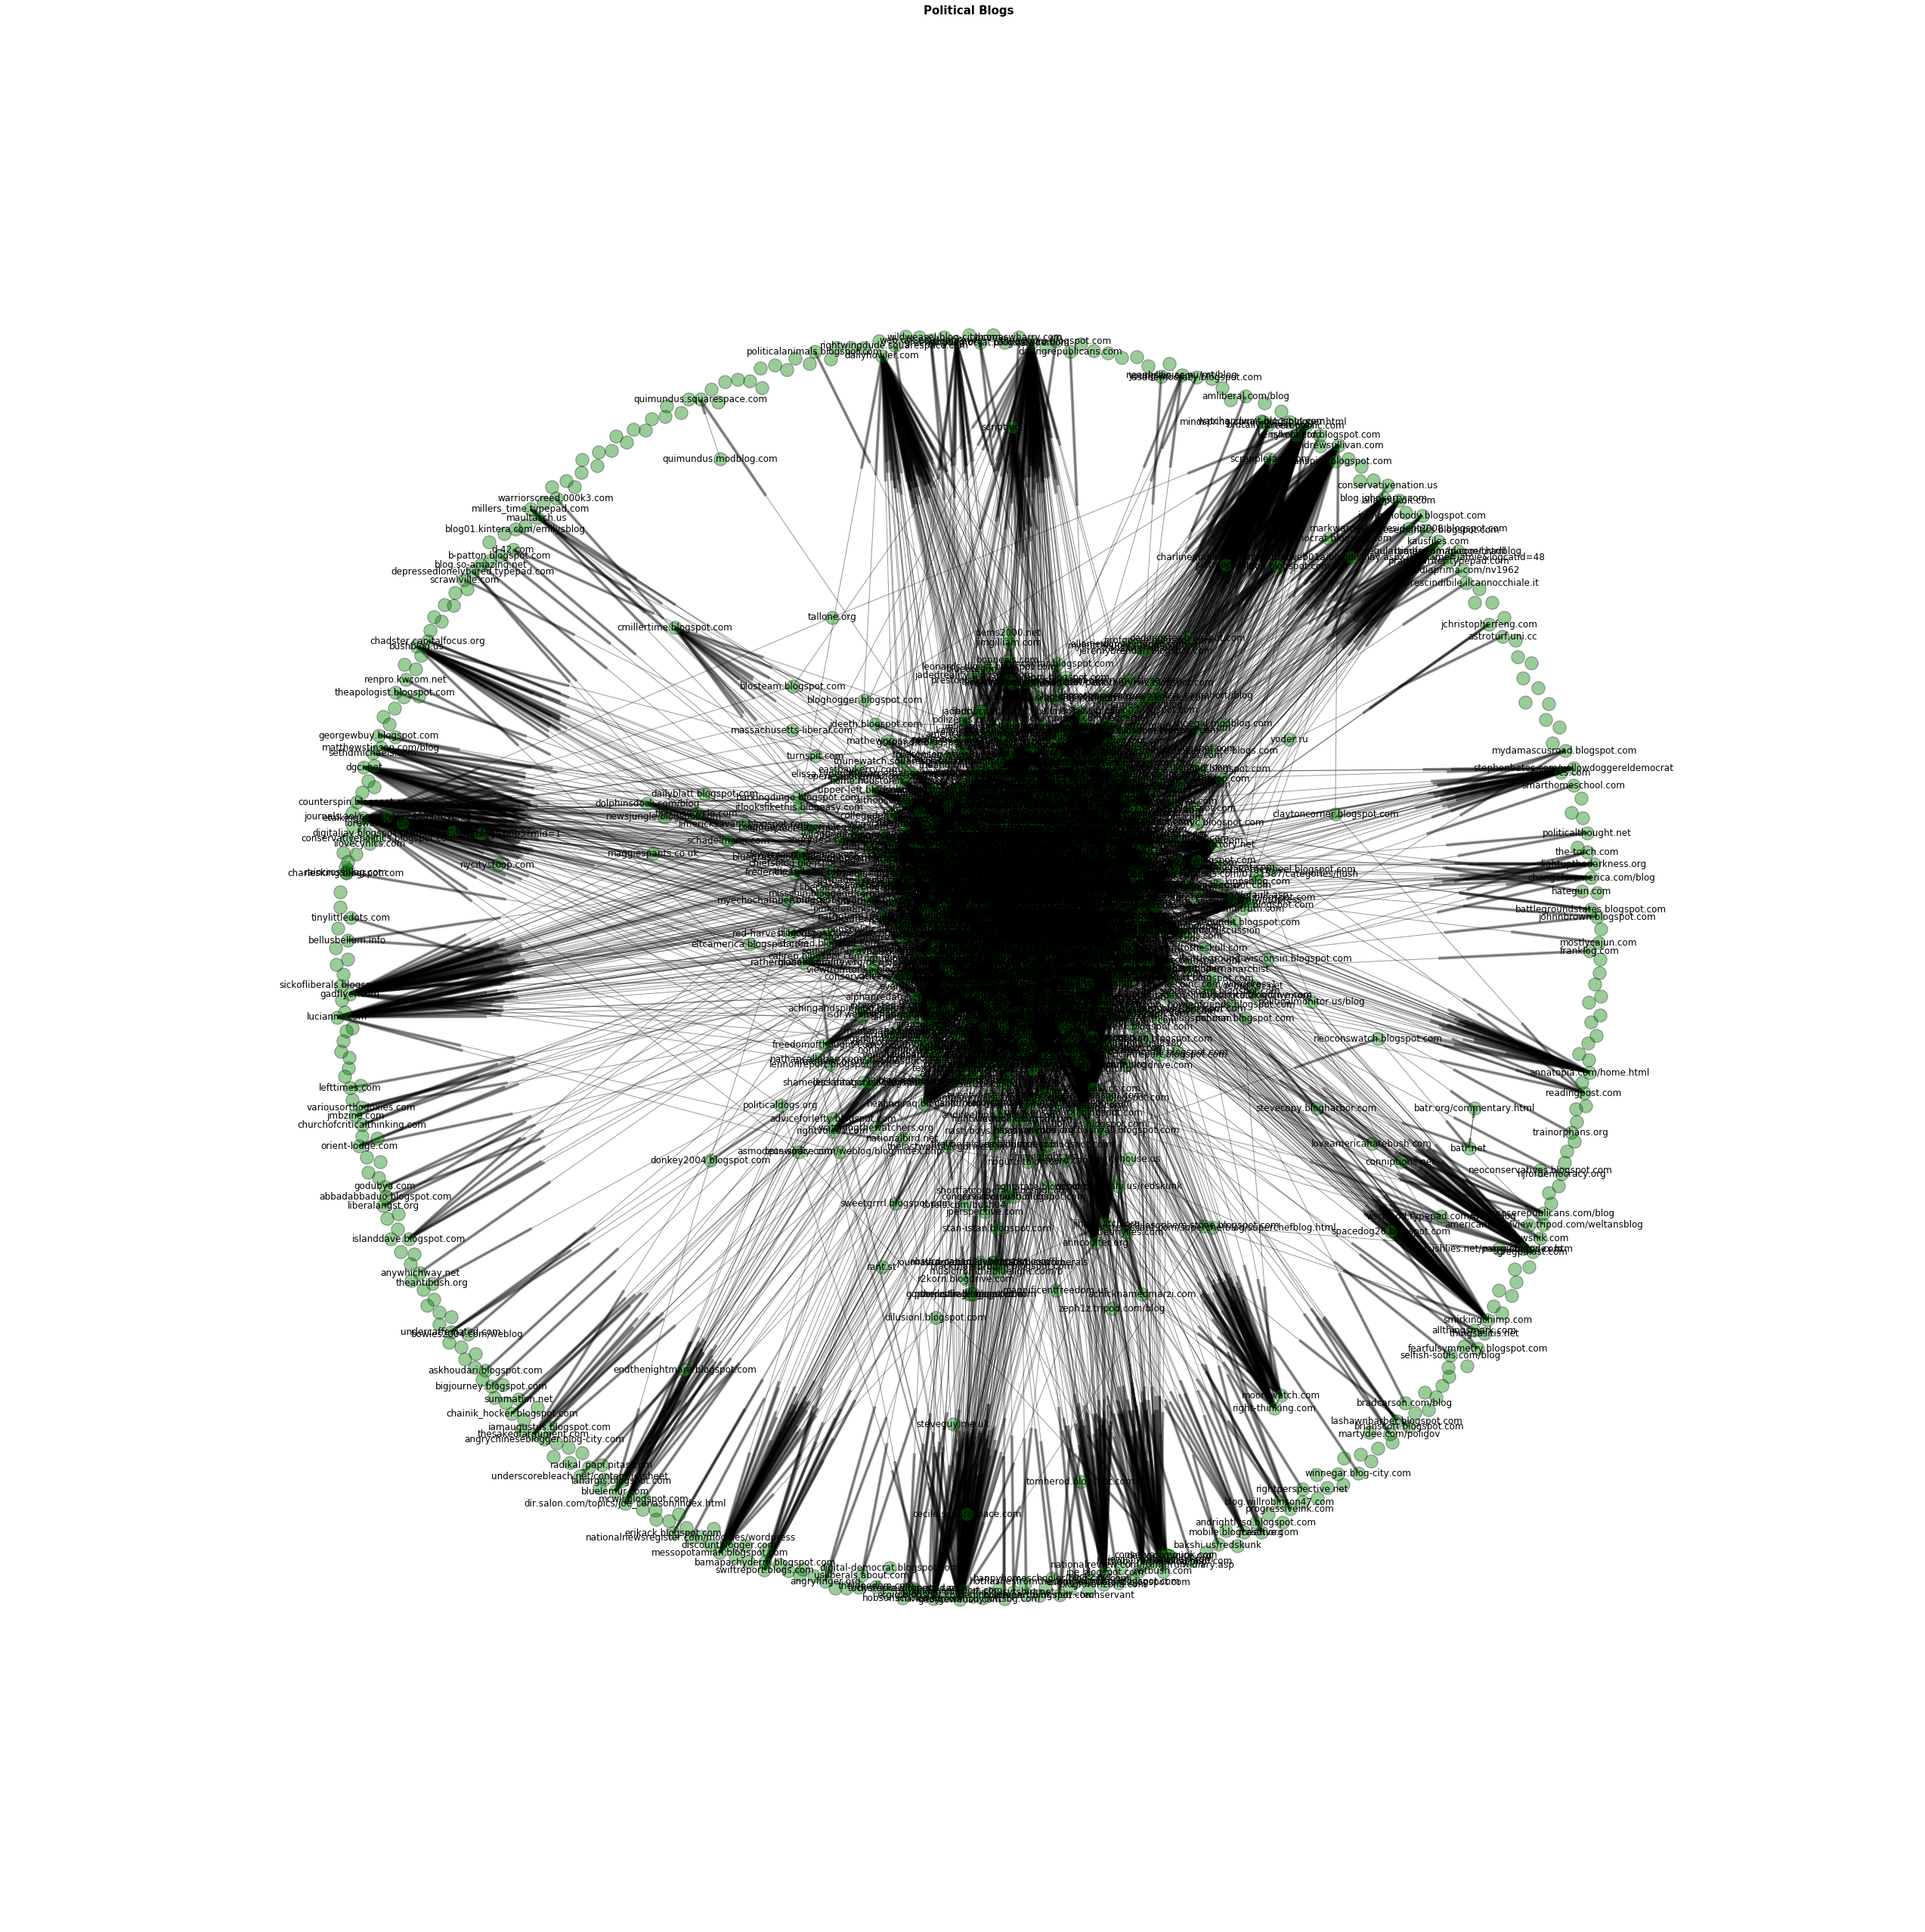

In [5]:
plt.figure(figsize=(45,45))
pos=nx.spring_layout(M ,iterations=300, scale=4, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {    'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 15}
plt.title("Political Blogs", font)

nx.draw_networkx_nodes(M,pos,node_color='G',alpha=0.4)
nx.draw_networkx_edges(M,pos,alpha=0.4,node_size=0,width=1,edge_color='K')
plt.axis('off')
plt.show()

## 2.  What are the 10 most influential blogs?

In [6]:
centrality=nx.eigenvector_centrality(G)

list = []
for node in centrality:
    list.append((node,centrality[node]))
    
sorted_list = list.sort(key=lambda x: x[1])



In [7]:
X=sorted(list, key=lambda x: x[1], reverse=True)

In [8]:
X[:15]

[(u'atrios.blogspot.com', 0.19480797936637712),
 (u'dailykos.com', 0.16089740205234834),
 (u'washingtonmonthly.com', 0.14653924259836884),
 (u'digbysblog.blogspot.com', 0.14264369221718315),
 (u'bodyandsoul.typepad.com', 0.14113489174330365),
 (u'liberaloasis.com', 0.13952371571107874),
 (u'tbogg.blogspot.com', 0.1370364169982426),
 (u'corrente.blogspot.com', 0.1294175927409615),
 (u'talkingpointsmemo.com', 0.12700519780790953),
 (u'dneiwert.blogspot.com', 0.12237564692546021),
 (u'pandagon.net', 0.1218362459729524),
 (u'billmon.org', 0.11749519874171407),
 (u'xnerg.blogspot.com', 0.11480053426058827),
 (u'madkane.com/notable.html', 0.11418196235451716),
 (u'elayneriggs.blogspot.com', 0.11264559582383814)]

## 3.  What are the 10 least influential blogs?

In [9]:
X=sorted(list, key=lambda x: x[1], reverse=False)

In [10]:
X[:15]

[(u'thelonedem.com', 1.776325109755966e-72),
 (u'digital-democrat.blogspot.com', 1.776325109755966e-72),
 (u'americanworldview.tripod.com/weltansblog', 7.491540638916243e-09),
 (u'quimundus.modblog.com', 6.682929975006485e-08),
 (u'batr.org/commentary.html', 6.795517611554005e-07),
 (u'batr.net', 6.796325594929459e-07),
 (u'democratvoice.org', 1.0233388204113302e-06),
 (u'quimundus.squarespace.com', 6.061741218869533e-06),
 (u'massachusetts-liberal.com', 9.483365235734506e-06),
 (u'thingsasitis.net', 1.173624965065861e-05),
 (u'loveamericahatebush.com', 2.0342028615381707e-05),
 (u'imprescindibile.ilcannocchiale.it', 2.3892545677495588e-05),
 (u'eltcamerica.blogspot.com', 2.836485902278943e-05),
 (u'usademocrazy.blogspot.com', 2.984438829543184e-05),
 (u'depressedlonelybored.typepad.com', 3.0401501993846e-05)]

## 4.  Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)